## 04. Pandas
Pandas is a library for data structure and analysis. Panel Data Analysis. It comes with two data structures:
- Data Series
- Data Frame


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Series

In [2]:
# Created a Pandas Series from a Python range
# when index is not provided, integers are used by default
ds = pd.Series(range(5))
print(ds)
type(ds)

0    0
1    1
2    2
3    3
4    4
dtype: int64


pandas.core.series.Series

In [3]:
# Created a Pandas Series from a Numpy array
# an index can be provided.
ds = pd.Series(np.random.randint(0, 10, 5), index=["MD", "VA","DC", "DE","PA"])
print(ds)
type(ds)

MD    4
VA    3
DC    9
DE    8
PA    8
dtype: int32


pandas.core.series.Series

In [4]:
# Created a Pandas Series from a Python dictionary
# the keys becom the index
states = {"MD":"Maryland",
     "PA":"Pennsylvania",
     "VA":"Virginia",
     "DC":"District of Columbia",
     "DE":"Delaware"
    }
ds = pd.Series(states)
print(ds)

MD                Maryland
PA            Pennsylvania
VA                Virginia
DC    District of Columbia
DE                Delaware
dtype: object


In [5]:
ds.shape

(5,)

### 2. Dataframe Basics
A dataframe is a two-dimensional array similar to an Excel spreadsheet.  Each column has a column name/label; Each row has a index to uniquely identify the row (observation, unit of analysis).

Properties:
- shape
- info()
- colummns
- index
- dtypes
- size

Methods:
- head()
- tail()
- sample()
- describe()

In [6]:
students = {
    "Name": ["Joe", "Jane", "Jack", "Jenny","Jerry", "June", "July"],
    "Score":[100, 98, 67, 80, 89, 93, 84],
    "Grade":["A", "A", "C", "B", "A-", "A", "B+"],
    "Full-time": [True, False, np.NaN, True, False, True, True],
    "Gender":["M", "F", "M", "F", "M", "F","F"]
}
df = pd.DataFrame(students)
print(df)
type(df)

    Name  Score Grade Full-time Gender
0    Joe    100     A      True      M
1   Jane     98     A     False      F
2   Jack     67     C       NaN      M
3  Jenny     80     B      True      F
4  Jerry     89    A-     False      M
5   June     93     A      True      F
6   July     84    B+      True      F


pandas.core.frame.DataFrame

In [7]:
# row index must be unique and it identifies each row (observation, unit of analysis)
#df2 = df.set_index("Name")
df.set_index("Name", inplace=True)
print(df)

       Score Grade Full-time Gender
Name                               
Joe      100     A      True      M
Jane      98     A     False      F
Jack      67     C       NaN      M
Jenny     80     B      True      F
Jerry     89    A-     False      M
June      93     A      True      F
July      84    B+      True      F


In [8]:
df["Score"]

Name
Joe      100
Jane      98
Jack      67
Jenny     80
Jerry     89
June      93
July      84
Name: Score, dtype: int64

In [9]:
df.index

Index(['Joe', 'Jane', 'Jack', 'Jenny', 'Jerry', 'June', 'July'], dtype='object', name='Name')

In [10]:
df

,Score,Grade,Full-time,Gender
Name,,,,
Joe,100,A,True,M
Jane,98,A,False,F
Jack,67,C,NaN,M
Jenny,80,B,True,F
Jerry,89,A-,False,M
June,93,A,True,F
July,84,B+,True,F


In [11]:
df.reset_index()

,Name,Score,Grade,Full-time,Gender
0,Joe,100,A,True,M
1,Jane,98,A,False,F
2,Jack,67,C,NaN,M
3,Jenny,80,B,True,F
4,Jerry,89,A-,False,M
5,June,93,A,True,F
6,July,84,B+,True,F


In [12]:
df.shape

(7, 4)

In [13]:
df.sample(3)

,Score,Grade,Full-time,Gender
Name,,,,
Jack,67,C,NaN,M
Jenny,80,B,True,F
July,84,B+,True,F


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Joe to July
Data columns (total 4 columns):
Score        7 non-null int64
Grade        7 non-null object
Full-time    6 non-null object
Gender       7 non-null object
dtypes: int64(1), object(3)
memory usage: 600.0+ bytes


In [15]:
df.describe(include="object")

,Grade,Full-time,Gender
count,7,6,7
unique,5,2,2
top,A,True,F
freq,3,4,4


In [16]:
df.head()

,Score,Grade,Full-time,Gender
Name,,,,
Joe,100,A,True,M
Jane,98,A,False,F
Jack,67,C,NaN,M
Jenny,80,B,True,F
Jerry,89,A-,False,M


### 3. Access Data Elements in a DataFrame
- using colum labels
- loc
- iloc
- at

In [17]:
df["Score"]

Name
Joe      100
Jane      98
Jack      67
Jenny     80
Jerry     89
June      93
July      84
Name: Score, dtype: int64

In [18]:
x = df[["Score", "Grade"]]
type(x)

pandas.core.frame.DataFrame

In [ ]:
# locate based on index and column names
x = df.loc["Joe"]
print(x)
type(x)

Score         100
Grade           A
Full-time    True
Gender          M
Name: Joe, dtype: object


pandas.core.series.Series

In [ ]:
# locate based on the integer position
x = df.iloc[2]  # the third row (Python index is 0-based)
print(x)
type(x)

Score         67
Grade          C
Full-time    NaN
Gender         M
Name: Jack, dtype: object


pandas.core.series.Series

In [ ]:
df[df["Grade"] == "A"]

,Score,Grade,Full-time,Gender
Name,,,,
Joe,100,A,True,M
Jane,98,A,False,F
June,93,A,True,F


In [ ]:
x = df.loc["Joe", "Score"]
print(x)
type(x)

100


numpy.int64

In [ ]:
x = df.loc["Joe":"Jack", "Score":"Full-time"]
print(x)
type(x)

      Score Grade Full-time
Name                       
Joe     100     A      True
Jane     98     A     False
Jack     67     C       NaN


pandas.core.frame.DataFrame

In [ ]:
x = df.loc[["Joe","Jack"], ["Score","Gender"]]
print(x)
type(x)

      Score Gender
Name              
Joe     100      M
Jack     67      M


pandas.core.frame.DataFrame

In [ ]:
# This is the same as df["Grade"] which is prefered
df.loc[:,"Grade"]     

Name
Joe       A
Jane      A
Jack      C
Jenny     B
Jerry    A-
June      A
July     B+
Name: Grade, dtype: object

### 4. Dataframe Manipulation
- add columns
- drop columns
- rename columns
- change column data type
- select rows 
- drop rows

In [ ]:
df["State"] = ["MD", "MD", "VA", "DC", "VA", "MD", "DC"]
df

,Score,Grade,Full-time,Gender,State
Name,,,,,
Joe,100,A,True,M,MD
Jane,98,A,False,F,MD
Jack,67,C,NaN,M,VA
Jenny,80,B,True,F,DC
Jerry,89,A-,False,M,VA
June,93,A,True,F,MD
July,84,B+,True,F,DC


In [ ]:
df.drop(columns=["State"])
df

,Score,Grade,Full-time,Gender,State
Name,,,,,
Joe,100,A,True,M,MD
Jane,98,A,False,F,MD
Jack,67,C,NaN,M,VA
Jenny,80,B,True,F,DC
Jerry,89,A-,False,M,VA
June,93,A,True,F,MD
July,84,B+,True,F,DC


In [ ]:
df.drop(columns=["State"], inplace=True)
df

,Score,Grade,Full-time,Gender
Name,,,,
Joe,100,A,True,M
Jane,98,A,False,F
Jack,67,C,NaN,M
Jenny,80,B,True,F
Jerry,89,A-,False,M
June,93,A,True,F
July,84,B+,True,F


### 5. Import Data

#### CMS Hospital Readmission Reduction Program Dataset 2019
This dataset can be analyzed in several different ways depending your interest (unit of analysis):
1. State
2. Hospital
3. Quality measure
</br>
heart attack (AMI) </br>
heart failure (HF)</br> 
pneumonia</br>
chronic obstructive pulmonary disease (COPD)</br>
hip/knee replacement (THA/TKA)</br>
coronary artery bypass graft surgery (CABG) 



In [ ]:
df = pd.read_csv("Hospital_Readmissions_Reduction_Program.csv")
df.head(3)

,Hospital Name,Provider ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_AMI_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
1,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_CABG_HRRP,Not Available,1 - The number of cases/patients is too few to...,Not Available,Not Available,Not Available,Not Available,07/01/2014,06/30/2017
2,BYRD REGIONAL HOSPITAL,190164,LA,READM_30_COPD_HRRP,217,NaN,1.0195,20.9722,20.5712,47,07/01/2014,06/30/2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
Hospital Name                 19674 non-null object
Provider ID                   19674 non-null int64
State                         19674 non-null object
Measure Name                  19674 non-null object
Number of Discharges          19674 non-null object
Footnote                      8157 non-null object
Excess Readmission Ratio      19674 non-null object
Predicted Readmission Rate    19674 non-null object
Expected Readmission Rate     19674 non-null object
Number of Readmissions        19674 non-null object
Start Date                    19674 non-null object
End Date                      19674 non-null object
dtypes: int64(1), object(11)
memory usage: 1.8+ MB


In [ ]:
df = df[["Hospital Name", "State", "Measure Name", "Excess Readmission Ratio"]]
df.head()

,Hospital Name,State,Measure Name,Excess Readmission Ratio
0,BYRD REGIONAL HOSPITAL,LA,READM_30_AMI_HRRP,Not Available
1,BYRD REGIONAL HOSPITAL,LA,READM_30_CABG_HRRP,Not Available
2,BYRD REGIONAL HOSPITAL,LA,READM_30_COPD_HRRP,1.0195
3,BYRD REGIONAL HOSPITAL,LA,READM_30_HF_HRRP,1.0773
4,BYRD REGIONAL HOSPITAL,LA,READM_30_HIP_KNEE_HRRP,Not Available


In [ ]:
col_names = {
    "Hospital Name": "Hospital",
    "Measure Name": "Measure",
    "Excess Readmission Ratio":"ERR"
}
df.rename(columns = col_names, inplace=True)
df.head()

,Hospital,State,Measure,ERR
0,BYRD REGIONAL HOSPITAL,LA,READM_30_AMI_HRRP,Not Available
1,BYRD REGIONAL HOSPITAL,LA,READM_30_CABG_HRRP,Not Available
2,BYRD REGIONAL HOSPITAL,LA,READM_30_COPD_HRRP,1.0195
3,BYRD REGIONAL HOSPITAL,LA,READM_30_HF_HRRP,1.0773
4,BYRD REGIONAL HOSPITAL,LA,READM_30_HIP_KNEE_HRRP,Not Available


In [ ]:
df[df["ERR"] == "Not Available"]

,Hospital,State,Measure,ERR
0,BYRD REGIONAL HOSPITAL,LA,READM_30_AMI_HRRP,Not Available
1,BYRD REGIONAL HOSPITAL,LA,READM_30_CABG_HRRP,Not Available
4,BYRD REGIONAL HOSPITAL,LA,READM_30_HIP_KNEE_HRRP,Not Available
6,GRAND ITASCA CLINIC AND HOSPITAL,MN,READM_30_AMI_HRRP,Not Available
7,GRAND ITASCA CLINIC AND HOSPITAL,MN,READM_30_CABG_HRRP,Not Available
12,HARMON HOSPITAL,NV,READM_30_AMI_HRRP,Not Available
13,HARMON HOSPITAL,NV,READM_30_CABG_HRRP,Not Available
14,HARMON HOSPITAL,NV,READM_30_COPD_HRRP,Not Available
15,HARMON HOSPITAL,NV,READM_30_HF_HRRP,Not Available
16,HARMON HOSPITAL,NV,READM_30_HIP_KNEE_HRRP,Not Available


In [ ]:
i = df[df["ERR"] == "Not Available"].index
print(i)
type(i)

Int64Index([    0,     1,     4,     6,     7,    12,    13,    14,    15,
               16,
            ...
            19611, 19612, 19613, 19614, 19615, 19618, 19627, 19633, 19663,
            19669],
           dtype='int64', length=5394)


pandas.core.indexes.numeric.Int64Index

In [ ]:
df.drop(i, inplace=True)

In [ ]:
df.head()

,Hospital,State,Measure,ERR
2,BYRD REGIONAL HOSPITAL,LA,READM_30_COPD_HRRP,1.0195
3,BYRD REGIONAL HOSPITAL,LA,READM_30_HF_HRRP,1.0773
5,BYRD REGIONAL HOSPITAL,LA,READM_30_PN_HRRP,1.1031
8,GRAND ITASCA CLINIC AND HOSPITAL,MN,READM_30_COPD_HRRP,1.0024
9,GRAND ITASCA CLINIC AND HOSPITAL,MN,READM_30_HF_HRRP,0.9726


In [ ]:
df.shape

(14280, 4)

In [ ]:
df["ERR"] = df["ERR"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14280 entries, 2 to 19673
Data columns (total 4 columns):
Hospital    14280 non-null object
State       14280 non-null object
Measure     14280 non-null object
ERR         14280 non-null float64
dtypes: float64(1), object(3)
memory usage: 557.8+ KB


### 5. Aggregation and Plotting

In [ ]:
x = df.groupby("Hospital").median()
print(x)
type(x)

                                                        ERR
Hospital                                                   
ABBEVILLE GENERAL HOSPITAL                          0.95750
ABBOTT NORTHWESTERN HOSPITAL                        0.95870
ABILENE REGIONAL MEDICAL CENTER                     0.94330
ABINGTON MEMORIAL HOSPITAL                          0.98030
ABRAZO ARROWHEAD CAMPUS                             0.95070
ABRAZO CENTRAL CAMPUS                               0.99840
ABRAZO SCOTTSDALE CAMPUS                            0.96185
ABRAZO WEST CAMPUS                                  1.05050
ACADIA GENERAL HOSPITAL                             0.99335
ACMH HOSPITAL                                       0.94670
ADENA REGIONAL MEDICAL CENTER                       0.96775
ADIRONDACK MEDICAL CENTER                           0.96935
ADVANCED SURGICAL HOSPITAL                          1.02080
ADVENTIST BOLINGBROOK HOSPITAL                      0.99330
ADVENTIST GLENOAKS                      

pandas.core.frame.DataFrame

In [ ]:
y = x.sort_values("ERR")
y.tail(10)

,ERR
Hospital,
SOUTH TEXAS SPINE AND SURGICAL HOSPITAL,1.18760
LAWNWOOD REGIONAL MEDICAL CENTER & HEART INSTITUTE,1.19005
"SOUTHCOAST HOSPITAL GROUP, INC",1.19195
PINE CREEK MEDICAL CENTER LLP,1.19590
OROVILLE HOSPITAL,1.19690
ARIZONA SPECIALTY HOSPITAL,1.21110
ST LUCIE MEDICAL CENTER,1.21130
MEMORIAL HERMANN SURGICAL HOSPITAL KINGWOOD,1.26600
WELLSPAN SURGERY AND REHABILITATION HOSPITAL,1.32080


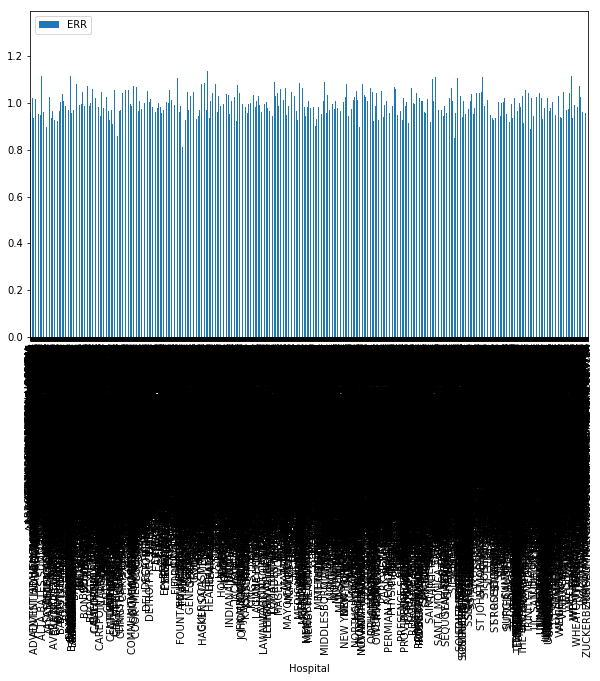

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
x.plot(kind="bar", ax=ax)

In [ ]:
#x.sort_values("ERR", ascending=True)
y = x.sort_values("ERR")
fig, ax = plt.subplots(figsize=(15,6))
y.plot(kind="bar", ax=ax)